Imports

In [46]:
import pandas as pd
import numpy as np

import importlib
import customfuntions as cf

import matplotlib.pyplot as plt

importlib.reload(cf)

<module 'customfuntions' from 'c:\\Users\\casey\\OneDrive\\Documents\\GitHub\\TitanicKaggle\\customfuntions.py'>

Load Data

In [47]:
X_train, X_test, y_train, y_test,full_data = cf.load_titanic_data()
full_data.head()

Train Data Shape :  (891, 12)
Test Data Shape :  (418, 11)
Test y Shape :  (418, 2)
Test shape after concat:  (418, 12)
Full data Shape : (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check class balance of Surivor variable

In [48]:
full_data['Survived'].value_counts()


Survived
0    815
1    494
Name: count, dtype: int64

Check for null values

In [49]:
missing_df = cf.missing(full_data)
missing_df

,Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


 - Age - Missing 263 values
 - Cabin - Missing 1014 values	

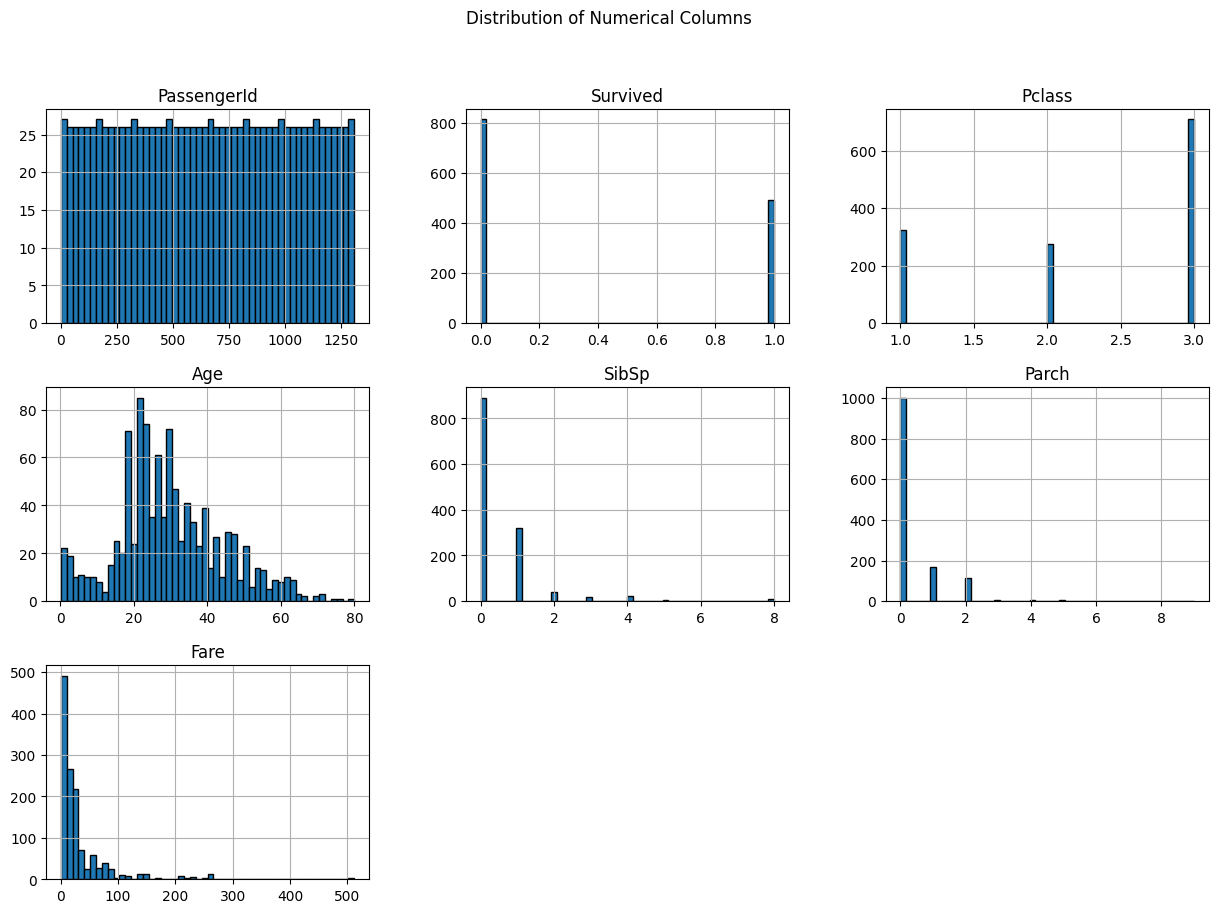

In [50]:
numerical_columns = full_data.select_dtypes(include=['float64', 'int64']).columns
full_data[numerical_columns].hist(bins=50, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

Skewness in Age, SibSp, Parch and Fare - Will Log+1 transform later

In [51]:
numerical_columns = full_data.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
survived_corr = corr_matrix["Survived"].sort_values(ascending=False)
print(survived_corr)


Survived       1.000000
Fare           0.233622
Parch          0.108919
SibSp          0.002370
PassengerId   -0.020370
Age           -0.053695
Pclass        -0.264710
Name: Survived, dtype: float64


Amongst the numerical data, there were no strong correlation seen. Fare has minor correlation.